# Binary Classififcation Using Decision Tree Classifier
## Objective - To Accurately predict the Target =1 using Decision Tree Classifier
#### Target  variable= 'target'
#### Classes  = 0 & 1
#### 0 = customer not likely to buy a new car
#### 1 = customer likely to buy a new car 

###### Data Dictionary:
ID: Unique ID of the customer
target: Model target. 1 if the customer has purchased more than 1 vehicle, 0 if they have only purchased 1.
age_band: Age banded into categories
gender: Male, Female or Missing
car_model: The model of vehicle, 18 models in total
car_segment: The type of vehicle
age_of_vehicle_years: Age of their last vehicle, in deciles
sched_serv_warr: Number of scheduled services (e.g. regular check-ups) used under warranty, in deciles
non_sched_serv_warr: Number of non-scheduled services (e.g. something broke out of the service cycle) used under warranty, in deciles
sched_serv_paid: Amount paid for scheduled services, in deciles
non_sched_serv_paid: Amount paid for non scheduled services, in deciles
total_paid_services: Amount paid in total for services, in deciles
total_services: Total number of services, in deciles
mth_since_last_serv: The number of months since the last service, in deciles
annualised_mileage: Annualised vehicle mileage, in deciles
num_dealers_visited: Number of different dealers visited for servicing, in deciles
num_serv_dealer_purchased: Number of services had at the same dealer where the vehicle was purchased, in deciles
### Project Steps:
##### 1. Loading and exploring data
##### 2. Preparing and cleaning data
##### 3. Splitting the data in Train (60%), Validation (20%) and Test (20%) sets
##### 4. Fitting the Decision Tree Classifier
##### 5. Assess Baseline Performance
##### 6. Assess the performance metrics on Validation and Test sets


### 1. Loading and exploring the data

In [58]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report

In [2]:
# Saving the CSV file into DataFrame df
data = pd.read_csv('/Users/varunsinghchhetri/Downloads/repurchase_training.csv')
df = pd.DataFrame(data)

In [3]:
# Displaying the first five rows of df
df.head()

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,1,0,3. 35 to 44,Male,model_1,LCV,9,2,10,3,7,5,6,9,8,10,4
1,2,0,NaN,NaN,model_2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10
2,3,0,NaN,Male,model_3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10
3,5,0,NaN,NaN,model_3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7
4,6,0,NaN,Female,model_2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9


In [4]:
# Displaying the descriptive statistics of the df
df.describe()

,ID,Target,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
count,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000
mean,77097.384180,0.026809,5.493022,5.452500,5.472517,5.452287,5.497050,5.481692,5.454967,5.469807,5.502836,5.485438,5.480778
std,44501.636704,0.161525,2.843299,2.884328,2.870665,2.886528,2.878699,2.880408,2.875961,2.859756,2.854896,2.876772,2.867524
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,38563.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,77132.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,115668.000000,0.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,154139.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [5]:
# displaying the number of rows and columns of df
df.shape

(131337, 17)

In [6]:
# displaying the summary (info) of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131337 entries, 0 to 131336
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         131337 non-null  int64 
 1   Target                     131337 non-null  int64 
 2   age_band                   18962 non-null   object
 3   gender                     62029 non-null   object
 4   car_model                  131337 non-null  object
 5   car_segment                131337 non-null  object
 6   age_of_vehicle_years       131337 non-null  int64 
 7   sched_serv_warr            131337 non-null  int64 
 8   non_sched_serv_warr        131337 non-null  int64 
 9   sched_serv_paid            131337 non-null  int64 
 10  non_sched_serv_paid        131337 non-null  int64 
 11  total_paid_services        131337 non-null  int64 
 12  total_services             131337 non-null  int64 
 13  mth_since_last_serv        131337 non-null  

In [7]:
# Checking for missing values
df.isnull().sum()

ID                                0
Target                            0
age_band                     112375
gender                        69308
car_model                         0
car_segment                       0
age_of_vehicle_years              0
sched_serv_warr                   0
non_sched_serv_warr               0
sched_serv_paid                   0
non_sched_serv_paid               0
total_paid_services               0
total_services                    0
mth_since_last_serv               0
annualised_mileage                0
num_dealers_visited               0
num_serv_dealer_purchased         0
dtype: int64

### 2. Preparing and Cleaning the data

In [8]:
# Checking the value counts of the classes of 0 and 1
df['Target'].value_counts()

0    127816
1      3521
Name: Target, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

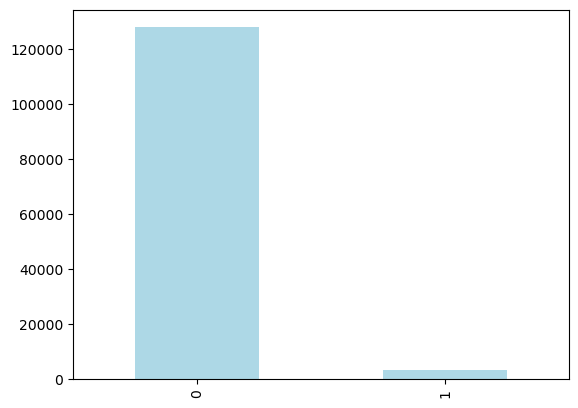

In [59]:
# Checking the value counts of the classes of 0 and 1
df['Target'].value_counts().plot(kind='bar', color='LightBlue')
plt.show

In [10]:
# Check for duplicates
duplicates = df.duplicated()

# Print number of duplicates
print(f"Number of duplicates: {duplicates.sum()}")

Number of duplicates: 0


In [11]:
# Dropping the 'ID' and 'age_band' columns as it is not required for in the process
df_copy = df.drop(['ID','age_band'], axis=1)

In [12]:
# Checking for missing values
df_copy.isnull().sum()

Target                           0
gender                       69308
car_model                        0
car_segment                      0
age_of_vehicle_years             0
sched_serv_warr                  0
non_sched_serv_warr              0
sched_serv_paid                  0
non_sched_serv_paid              0
total_paid_services              0
total_services                   0
mth_since_last_serv              0
annualised_mileage               0
num_dealers_visited              0
num_serv_dealer_purchased        0
dtype: int64

In [14]:
# Replace missing values in a specific column with 'unknown'
df_copy['gender'] = df_copy['gender'].fillna('unknown')

In [60]:
# Confirming if there are any missing values still left in the dataset
df_copy.isnull().sum()

Target                       0
age_of_vehicle_years         0
sched_serv_warr              0
non_sched_serv_warr          0
sched_serv_paid              0
non_sched_serv_paid          0
total_paid_services          0
total_services               0
mth_since_last_serv          0
annualised_mileage           0
num_dealers_visited          0
num_serv_dealer_purchased    0
car_model_model_1            0
car_model_model_10           0
car_model_model_11           0
car_model_model_12           0
car_model_model_13           0
car_model_model_14           0
car_model_model_15           0
car_model_model_16           0
car_model_model_17           0
car_model_model_18           0
car_model_model_19           0
car_model_model_2            0
car_model_model_3            0
car_model_model_4            0
car_model_model_5            0
car_model_model_6            0
car_model_model_7            0
car_model_model_8            0
car_model_model_9            0
car_segment_LCV              0
car_segm

In [15]:
# Understanding the Categorical columns
df_copy[['gender','car_model','car_segment']]

,gender,car_model,car_segment
0,Male,model_1,LCV
1,unknown,model_2,Small/Medium
2,Male,model_3,Large/SUV
3,unknown,model_3,Large/SUV
4,Female,model_2,Small/Medium
...,...,...,...
131332,unknown,model_3,Large/SUV
131333,unknown,model_3,Large/SUV
131334,unknown,model_5,Large/SUV
131335,unknown,model_5,Large/SUV


In [16]:
# Performing One Hot Encoding
df_copy = pd.get_dummies(df_copy, columns=['car_model', 'car_segment', 'gender'])

In [17]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131337 entries, 0 to 131336
Data columns (total 38 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   Target                     131337 non-null  int64
 1   age_of_vehicle_years       131337 non-null  int64
 2   sched_serv_warr            131337 non-null  int64
 3   non_sched_serv_warr        131337 non-null  int64
 4   sched_serv_paid            131337 non-null  int64
 5   non_sched_serv_paid        131337 non-null  int64
 6   total_paid_services        131337 non-null  int64
 7   total_services             131337 non-null  int64
 8   mth_since_last_serv        131337 non-null  int64
 9   annualised_mileage         131337 non-null  int64
 10  num_dealers_visited        131337 non-null  int64
 11  num_serv_dealer_purchased  131337 non-null  int64
 12  car_model_model_1          131337 non-null  uint8
 13  car_model_model_10         131337 non-null  uint8
 14  car_

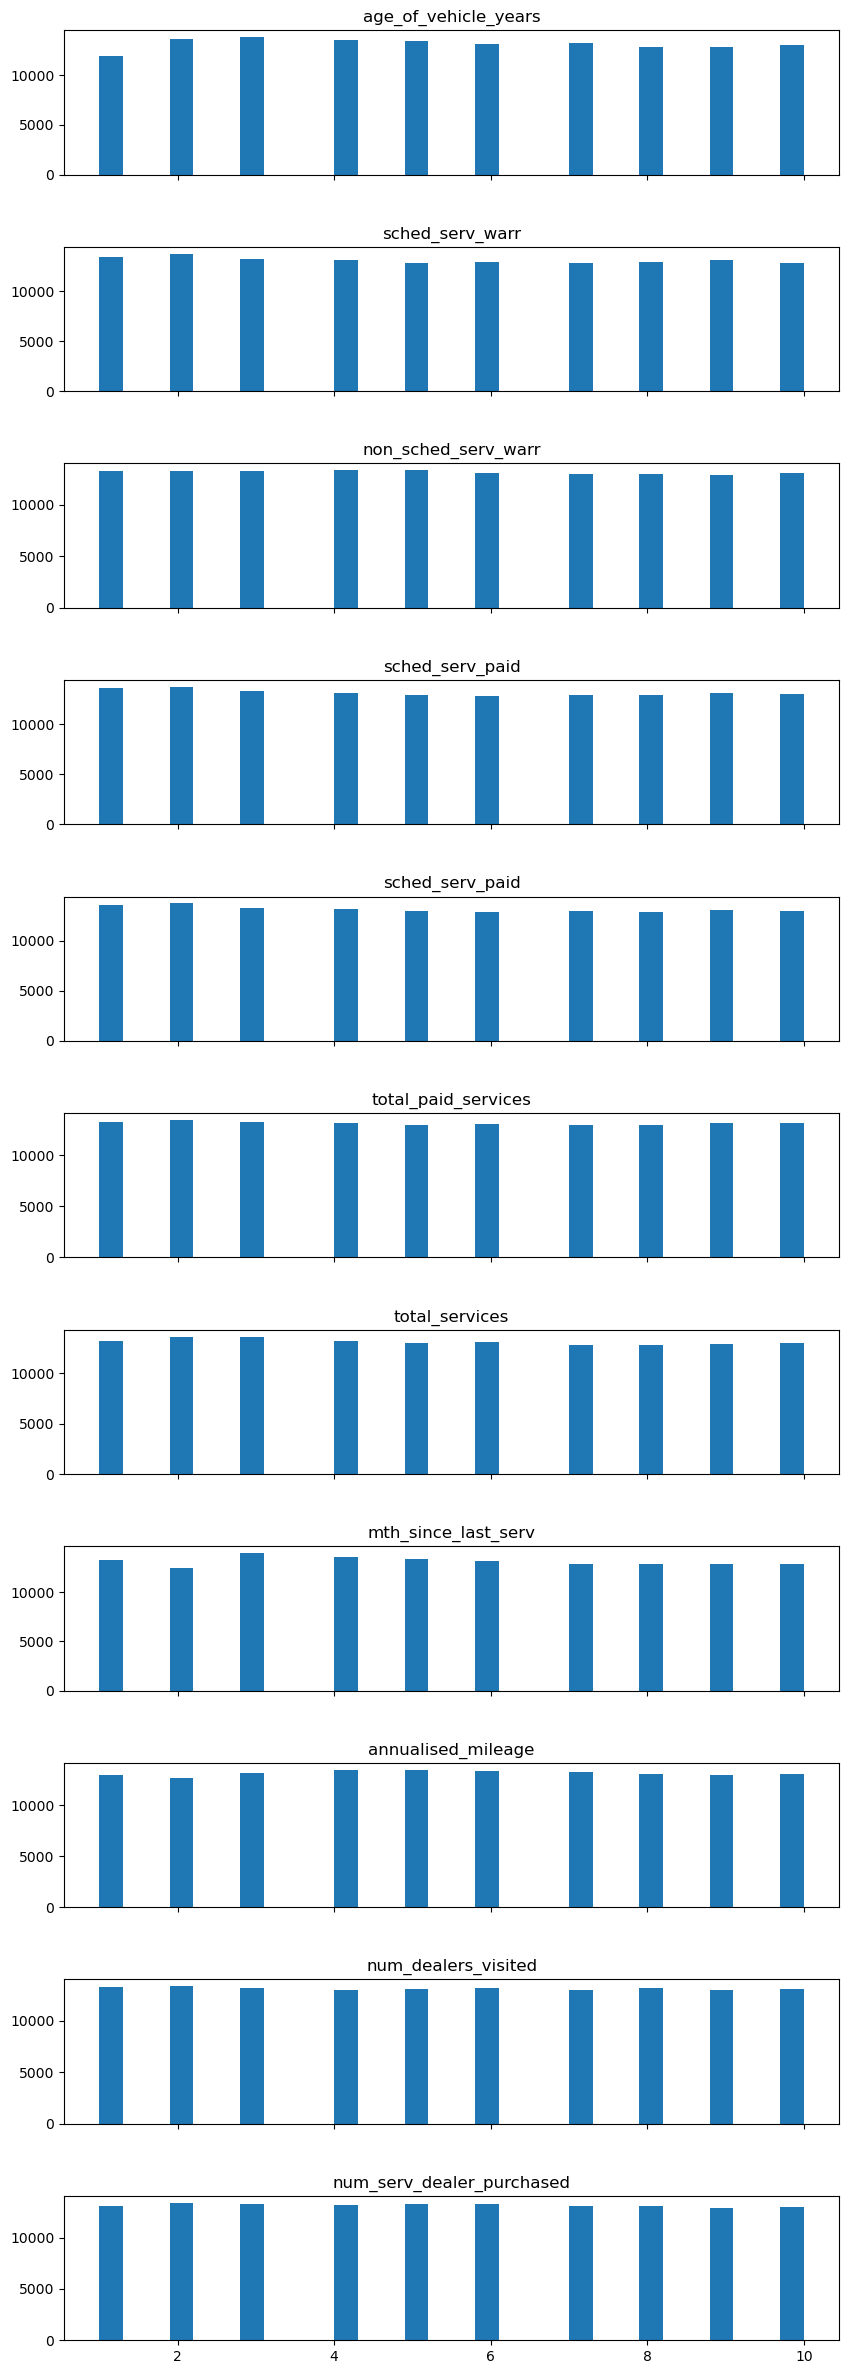

In [61]:
# Plotting histogram to check the distribution of columns

cols_to_check = ['age_of_vehicle_years', 'sched_serv_warr', 'non_sched_serv_warr', 'sched_serv_paid', 'sched_serv_paid', 'total_paid_services', 'total_services', 'mth_since_last_serv', 'annualised_mileage', 'num_dealers_visited', 'num_serv_dealer_purchased']

# Create subplots for each column
fig, axs = plt.subplots(nrows=len(cols_to_check), figsize=(10, 30), sharex=True)

# Plot histograms for each column
for i, col in enumerate(cols_to_check):
    axs[i].hist(df[col], bins=30)
    axs[i].set_title(col)

plt.subplots_adjust(hspace=0.5)
plt.show()

### 3. Splitting the dataset into Train (20%), Validation (20%) and Test (20%) sets

In [19]:
X = df_copy.drop('Target', axis=1) # features
y = df_copy['Target'] # target variable

# split into train, validation and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) 

# check the shape of the data
print('Train set:', X_train.shape, y_train.shape)
print('Validation set:', X_val.shape, y_val.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (78801, 37) (78801,)
Validation set: (26268, 37) (26268,)
Test set: (26268, 37) (26268,)


In [20]:
y_train.value_counts()

0    76645
1     2156
Name: Target, dtype: int64

In [21]:
y_val.value_counts()

0    25563
1      705
Name: Target, dtype: int64

In [22]:
y_test.value_counts()

0    25608
1      660
Name: Target, dtype: int64

### 4. Training the Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
# Create Decision Tree model
dt_model = DecisionTreeClassifier()

# Fit the model on train set
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

### 5. Assessing the Baseline Performance

In [62]:
# Assess baseline performance with majority class prediction

majority_class = y_train.mode()[0]
y_val_majority = [majority_class] * len(y_val)
acc_val_base = accuracy_score(y_val, y_val_majority)

print('Baseline performance:')
print(f'Accuracy: {acc_val_base:.6f}')

Baseline performance:
Accuracy: 0.973161


### 6. Assessing the performance on validation set

In [25]:
# Make predictions on validation data
y_val_pred = dt_model.predict(X_val)

# Calculate evaluation metrics on validation data
acc_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)
auc_roc_val = roc_auc_score(y_val,  dt_model.predict_proba(X_val)[:,1])

# Print evaluation metrics on validation data
print('Validation set evaluation metrics:')
print(f'Accuracy: {acc_val:.6f}')
print(f'Precision: {precision_val:.6f}')
print(f'Recall: {recall_val:.6f}')
print(f'F1 score: {f1_val:.6f}')
print(f'AUC-ROC score: {auc_roc_val:.6f}')

Validation set evaluation metrics:
Accuracy: 0.989150
Precision: 0.800000
Recall: 0.794326
F1 score: 0.797153
AUC-ROC score: 0.894421


### Changing the class weight to balanced to check the performance metrics

In [26]:
# Define the random forest classifier model and fit on the train data
rf_class = DecisionTreeClassifier(random_state=42,class_weight='balanced')
rf_class.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [27]:
# Make predictions on validation data
y_val_pred = rf_class.predict(X_val)

# Calculate evaluation metrics on validation data
acc_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)
auc_roc_val = roc_auc_score(y_val,  rf_class.predict_proba(X_val)[:,1])

# Print evaluation metrics on validation data
print('Validation set evaluation metrics:')
print(f'Accuracy: {acc_val:.2f}')
print(f'Precision: {precision_val:.2f}')
print(f'Recall: {recall_val:.2f}')
print(f'F1 score: {f1_val:.2f}')
print(f'AUC-ROC score: {auc_roc_val:.4f}')

Validation set evaluation metrics:
Accuracy: 0.99
Precision: 0.80
Recall: 0.73
F1 score: 0.77
AUC-ROC score: 0.8649


### Trying oversampling to compare the performance metrics

In [28]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE()

# Fit and transform the training data
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [29]:
print('Train set:', X_train_over.shape, y_train_over.shape)

Train set: (153290, 37) (153290,)


In [30]:
# Define the random forest classifier model and fit on the train data
rfo = DecisionTreeClassifier(random_state=42,)
rfo.fit(X_train_over, y_train_over)


DecisionTreeClassifier(random_state=42)

In [31]:
# Make predictions on validation data
y_val_pred = rfo.predict(X_val)

# Calculate evaluation metrics on validation data
acc_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)
auc_roc_val = roc_auc_score(y_val,  rfo.predict_proba(X_val)[:,1])

# Print evaluation metrics on validation data
print('Validation set evaluation metrics:')
print(f'Accuracy: {acc_val:.6f}')
print(f'Precision: {precision_val:.6f}')
print(f'Recall: {recall_val:.6f}')
print(f'F1 score: {f1_val:.6f}')
print(f'AUC-ROC score: {auc_roc_val:.6f}')

Validation set evaluation metrics:
Accuracy: 0.981879
Precision: 0.643664
Recall: 0.727660
F1 score: 0.683089
AUC-ROC score: 0.858275


### Hyper-Parameter Tuning

### max_dept

In [32]:
# Define the random forest classifier model and fit on the train data
dt_model3 = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [33]:
# Make predictions on validation data
y_val_pred = dt_model3.predict(X_val)

# Calculate evaluation metrics on validation data
acc_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)
auc_roc_val = roc_auc_score(y_val,  dt_model3.predict_proba(X_val)[:,1])

# Print evaluation metrics on validation data
print('Validation set evaluation metrics:')
print(f'Accuracy: {acc_val:.6f}')
print(f'Precision: {precision_val:.6f}')
print(f'Recall: {recall_val:.6f}')
print(f'F1 score: {f1_val:.6f}')
print(f'AUC-ROC score: {auc_roc_val:.6f}')

Validation set evaluation metrics:
Accuracy: 0.983250
Precision: 0.886297
Recall: 0.431206
F1 score: 0.580153
AUC-ROC score: 0.939693


In [34]:
# Define the random forest classifier model and fit on the train data
dt_model4 = DecisionTreeClassifier(random_state=42, max_depth=10)
dt_model4.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [35]:
# Make predictions on validation data
y_val_pred = dt_model4.predict(X_val)

# Calculate evaluation metrics on validation data
acc_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)
auc_roc_val = roc_auc_score(y_val,  dt_model4.predict_proba(X_val)[:,1])

# Print evaluation metrics on validation data
print('Validation set evaluation metrics:')
print(f'Accuracy: {acc_val:.6f}')
print(f'Precision: {precision_val:.6f}')
print(f'Recall: {recall_val:.6f}')
print(f'F1 score: {f1_val:.6f}')
print(f'AUC-ROC score: {auc_roc_val:.6f}')

Validation set evaluation metrics:
Accuracy: 0.989379
Precision: 0.898876
Recall: 0.680851
F1 score: 0.774818
AUC-ROC score: 0.947530


In [36]:
# Define the random forest classifier model and fit on the train data
dt_model5 = DecisionTreeClassifier(random_state=42, max_depth=20)
dt_model5.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, random_state=42)

In [37]:
# Make predictions on validation data
y_val_pred = dt_model5.predict(X_val)

# Calculate evaluation metrics on validation data
acc_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)
auc_roc_val = roc_auc_score(y_val,  dt_model5.predict_proba(X_val)[:,1])

# Print evaluation metrics on validation data
print('Validation set evaluation metrics:')
print(f'Accuracy: {acc_val:.6f}')
print(f'Precision: {precision_val:.6f}')
print(f'Recall: {recall_val:.6f}')
print(f'F1 score: {f1_val:.6f}')
print(f'AUC-ROC score: {auc_roc_val:.6f}')

Validation set evaluation metrics:
Accuracy: 0.989417
Precision: 0.808081
Recall: 0.794326
F1 score: 0.801144
AUC-ROC score: 0.894525


### min sample split

In [38]:
# Define the random forest classifier model and fit on the train data
dt_model6 = DecisionTreeClassifier(random_state=42, max_depth=20, min_samples_split=5)
dt_model6.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_split=5, random_state=42)

In [39]:
# Make predictions on validation data
y_val_pred = dt_model6.predict(X_val)

# Calculate evaluation metrics on validation data
acc_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)
auc_roc_val = roc_auc_score(y_val,  dt_model6.predict_proba(X_val)[:,1])

# Print evaluation metrics on validation data
print('Validation set evaluation metrics:')
print(f'Accuracy: {acc_val:.6f}')
print(f'Precision: {precision_val:.6f}')
print(f'Recall: {recall_val:.6f}')
print(f'F1 score: {f1_val:.6f}')
print(f'AUC-ROC score: {auc_roc_val:.6f}')

Validation set evaluation metrics:
Accuracy: 0.990635
Precision: 0.845113
Recall: 0.797163
F1 score: 0.820438
AUC-ROC score: 0.913295


In [40]:
# Define the random forest classifier model and fit on the train data
dt_model7 = DecisionTreeClassifier(random_state=42, max_depth=20, min_samples_split=10)
dt_model7.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_split=10, random_state=42)

In [41]:
# Make predictions on validation data
y_val_pred = dt_model7.predict(X_val)

# Calculate evaluation metrics on validation data
acc_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)
auc_roc_val = roc_auc_score(y_val,  dt_model7.predict_proba(X_val)[:,1])

# Print evaluation metrics on validation data
print('Validation set evaluation metrics:')
print(f'Accuracy: {acc_val:.6f}')
print(f'Precision: {precision_val:.6f}')
print(f'Recall: {recall_val:.6f}')
print(f'F1 score: {f1_val:.6f}')
print(f'AUC-ROC score: {auc_roc_val:.6f}')

Validation set evaluation metrics:
Accuracy: 0.991092
Precision: 0.856278
Recall: 0.802837
F1 score: 0.828697
AUC-ROC score: 0.924765


### min_samples_leaf

In [42]:
# Define the random forest classifier model and fit on the train data
dt_model8 = DecisionTreeClassifier(random_state=42, max_depth=20, min_samples_split=10, min_samples_leaf=2)
dt_model8.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=10,
                       random_state=42)

In [43]:
# Make predictions on validation data
y_val_pred = dt_model8.predict(X_val)

# Calculate evaluation metrics on validation data
acc_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)
auc_roc_val = roc_auc_score(y_val,  dt_model8.predict_proba(X_val)[:,1])

# Print evaluation metrics on validation data
print('Validation set evaluation metrics:')
print(f'Accuracy: {acc_val:.6f}')
print(f'Precision: {precision_val:.6f}')
print(f'Recall: {recall_val:.6f}')
print(f'F1 score: {f1_val:.6f}')
print(f'AUC-ROC score: {auc_roc_val:.6f}')

Validation set evaluation metrics:
Accuracy: 0.990863
Precision: 0.864992
Recall: 0.781560
F1 score: 0.821162
AUC-ROC score: 0.927715


In [44]:
# Define the random forest classifier model and fit on the train data
dt_model9 = DecisionTreeClassifier(random_state=42, max_depth=20, min_samples_split=10, min_samples_leaf=4)
dt_model9.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [45]:
# Make predictions on validation data
y_val_pred = dt_model9.predict(X_val)

# Calculate evaluation metrics on validation data
acc_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)
auc_roc_val = roc_auc_score(y_val,  dt_model9.predict_proba(X_val)[:,1])

# Print evaluation metrics on validation data
print('Validation set evaluation metrics:')
print(f'Accuracy: {acc_val:.6f}')
print(f'Precision: {precision_val:.6f}')
print(f'Recall: {recall_val:.6f}')
print(f'F1 score: {f1_val:.6f}')
print(f'AUC-ROC score: {auc_roc_val:.6f}')

Validation set evaluation metrics:
Accuracy: 0.989950
Precision: 0.856220
Recall: 0.751773
F1 score: 0.800604
AUC-ROC score: 0.925441


### 6. Assessing the Performance Metrics on the Test Set with best hyperparameters

In [49]:
# Make predictions on test data
y_test_pred = dt_model8.predict(X_test)

# Calculate evaluation metrics on test data
acc_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
auc_roc_test = roc_auc_score(y_test,  dt_model7.predict_proba(X_test)[:,1])

# Print evaluation metrics on test data
print('\nTest set evaluation metrics:')
print(f'Accuracy: {acc_test:.6f}')
print(f'Precision: {precision_test:.6f}')
print(f'Recall: {recall_test:.6f}')
print(f'F1 score: {f1_test:.6f}')
print(f'AUC-ROC score: {auc_roc_test:.6f}')



Test set evaluation metrics:
Accuracy: 0.990940
Precision: 0.839228
Recall: 0.790909
F1 score: 0.814353
AUC-ROC score: 0.915525


In [50]:
# Create classification report for test data
class_report = classification_report(y_test, y_test_pred)
print('\nClassification report:')
print(class_report)


Classification report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     25608
           1       0.84      0.79      0.81       660

    accuracy                           0.99     26268
   macro avg       0.92      0.89      0.90     26268
weighted avg       0.99      0.99      0.99     26268



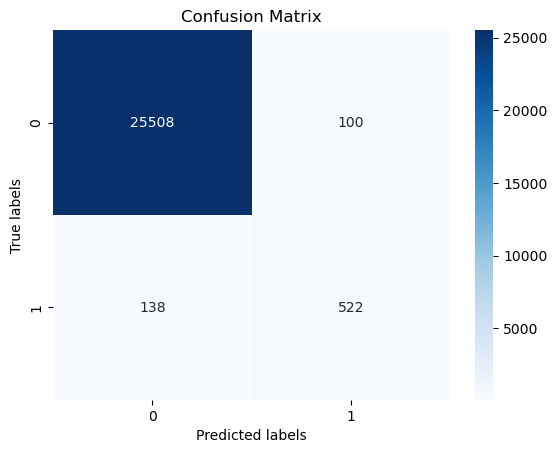

In [57]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Create heatmap plot of confusion matrix
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g')

# Set plot labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Show plot
plt.show()

### Plotting Feature Importance graph

In [51]:
dt_model8.feature_importances_

array([8.80840273e-02, 5.49021503e-02, 5.34497354e-02, 3.32367077e-02,
       1.20962633e-02, 7.40644881e-02, 1.05858499e-01, 2.87306612e-01,
       8.92940030e-02, 4.72074947e-02, 9.21242452e-02, 1.79836968e-03,
       9.99135888e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.45830958e-03, 3.63439513e-03,
       7.39356335e-04, 2.91026795e-03, 2.49159964e-04, 1.43575653e-03,
       1.70937316e-03, 4.21022988e-04, 2.19594514e-03, 1.73694608e-03,
       0.00000000e+00, 1.02039719e-03, 1.32440608e-03, 3.97488110e-03,
       3.57680504e-02])

In [53]:
feat_imp_rf_df = pd.DataFrame(
    {
        'feature': X.columns,
     'feature_importance': dt_model8.feature_importances_
     }
)

In [54]:
feat_imp_rf_df = feat_imp_rf_df.sort_values('feature_importance', ascending=False).reset_index(drop=True)

In [55]:
feat_imp_rf_df

,feature,feature_importance
0,mth_since_last_serv,0.287307
1,total_services,0.105858
2,num_serv_dealer_purchased,0.092124
3,annualised_mileage,0.089294
4,age_of_vehicle_years,0.088084
5,total_paid_services,0.074064
6,sched_serv_warr,0.054902
7,non_sched_serv_warr,0.053450
8,num_dealers_visited,0.047207
9,gender_unknown,0.035768


In [56]:
import altair as alt

alt.Chart(feat_imp_rf_df).mark_bar().encode(
    x='feature_importance',
    y=alt.Y("feature", sort='-x'),
    tooltip=['feature','feature_importance'])

alt.Chart(...)